In [5]:
import pandas as pd



In [6]:
names_babys = pd.read_csv('yob1880.txt', names=['nome', 'sexo','quantidade'])

In [7]:
names_babys


,nome,sexo,quantidade
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [8]:
names_babys.groupby('sexo').quantidade.sum()

sexo
F     90994
M    110490
Name: quantidade, dtype: int64

In [18]:
anos = range(1880,2011)

lista = []
colunas = ['nome','sexo','quantidade']

for ano in anos:
    pacote = 'C:/Users/guilh/Desktop/Projeto_Guilherme/Nomes/yob%d.txt' % ano
    frame = pd.read_csv(pacote, names=colunas)
    
    frame['ano']=ano
    lista.append(frame)
    
    nomes_babys = pd.concat(lista,ignore_index=True)

In [19]:
nomes_babys

,nome,sexo,quantidade,ano
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692391,Zymaire,M,5,2010
1692392,Zyonne,M,5,2010
1692393,Zyquarius,M,5,2010
1692394,Zyran,M,5,2010


In [21]:
total_anos = nomes_babys.pivot_table('quantidade',index='ano',columns='sexo',aggfunc=sum)

In [24]:
total_anos.tail()

sexo,F,M
ano,,
2006,1900375,2054352
2007,1921655,2074427
2008,1889800,2038995
2009,1835873,1982310
2010,1776223,1917416


<AxesSubplot:title={'center':'Total de quantidade por sexo e ano'}, xlabel='ano'>

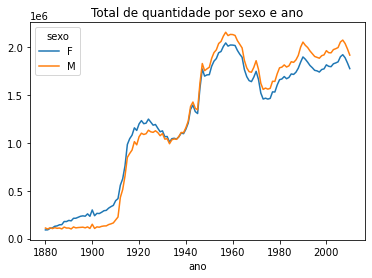

In [23]:
total_anos.plot(title='Total de quantidade por sexo e ano')